In [1]:
# !python3 main.py

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

(1000, 24)
Prob of 7-th player win in the 68-th game: 0.10900402556008458
(1000, 24)
Prob of 7-th player win in the 68-th game: 0.1171224481547718
(1000, 48)
Prob of 7-th player win in the 68-th game: 0.1108735545521057
(1000, 48)
Prob of 7-th player win in the 68-th game: 0.11835312823686361


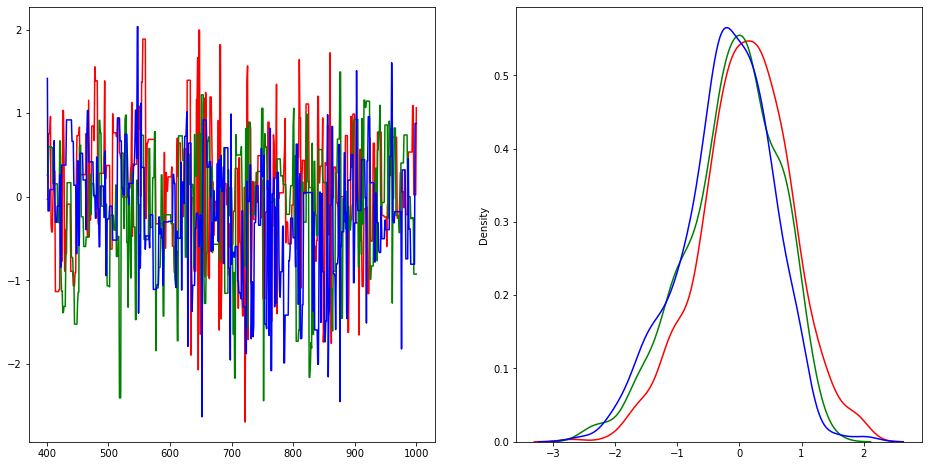

<Figure size 432x288 with 0 Axes>

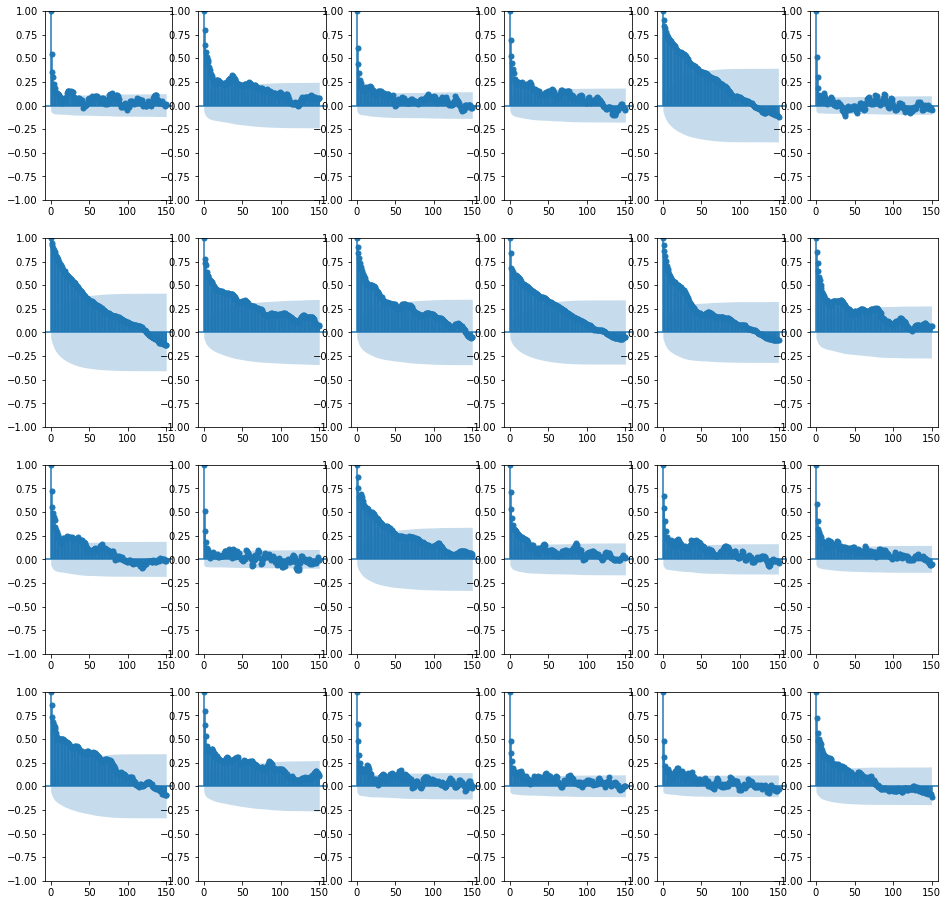

<Figure size 432x288 with 0 Axes>

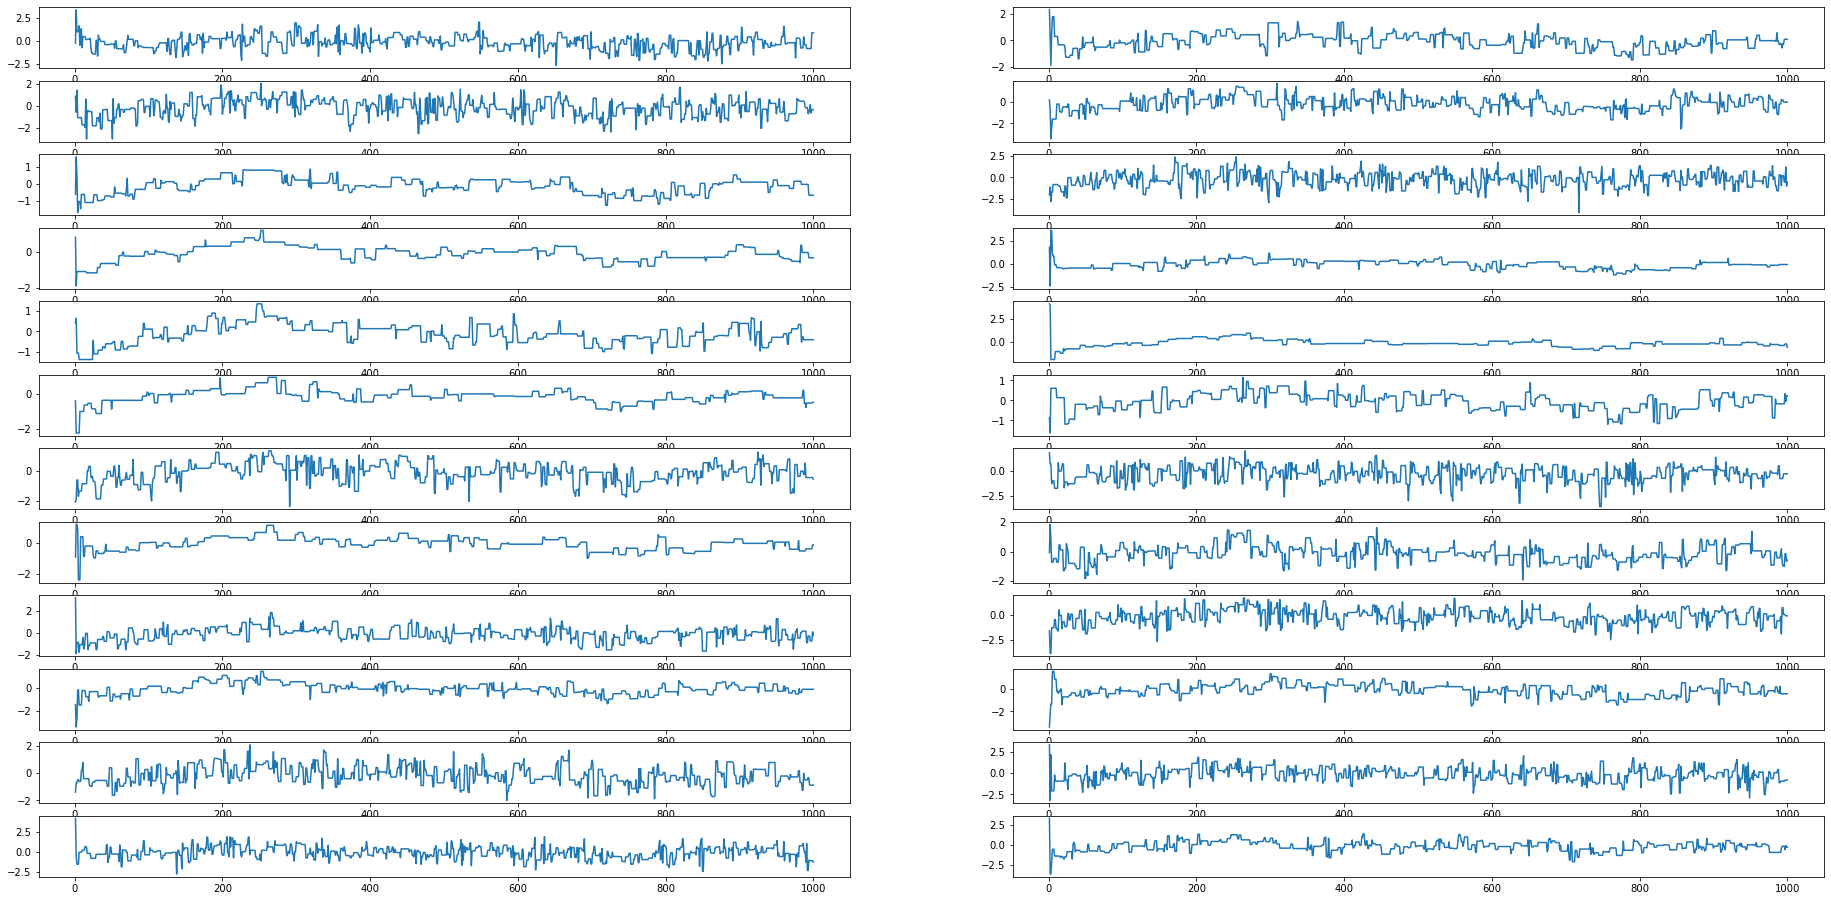

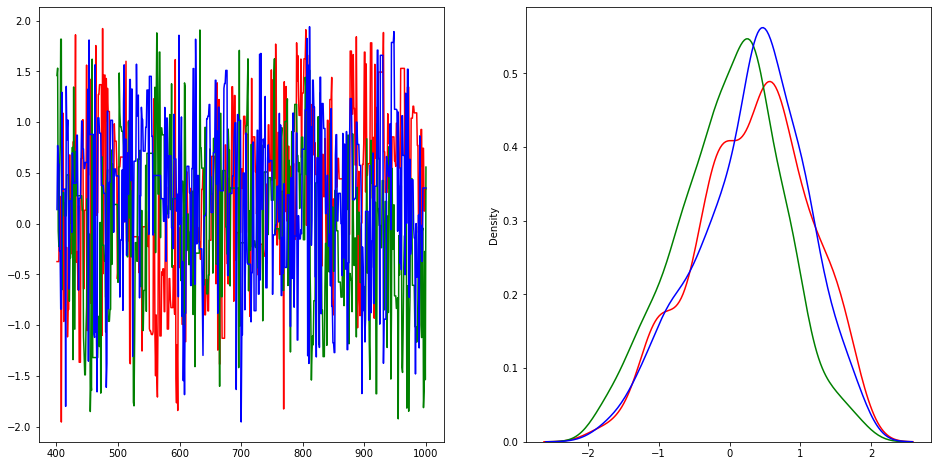

<Figure size 432x288 with 0 Axes>

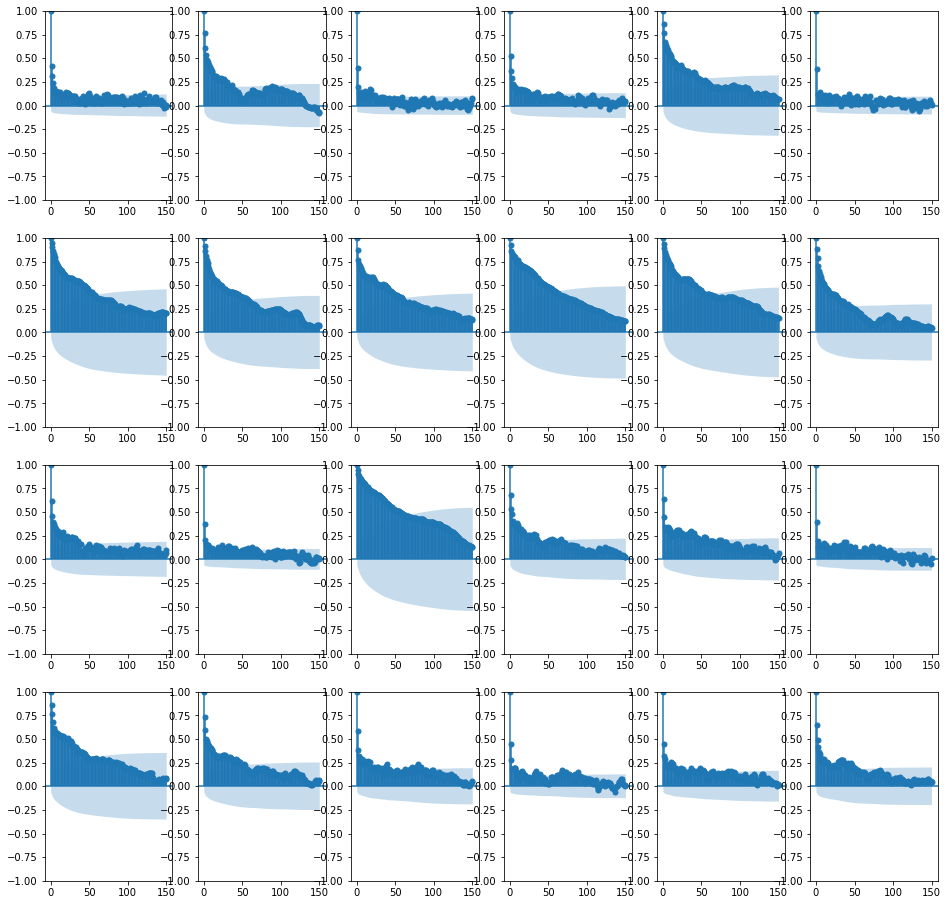

<Figure size 432x288 with 0 Axes>

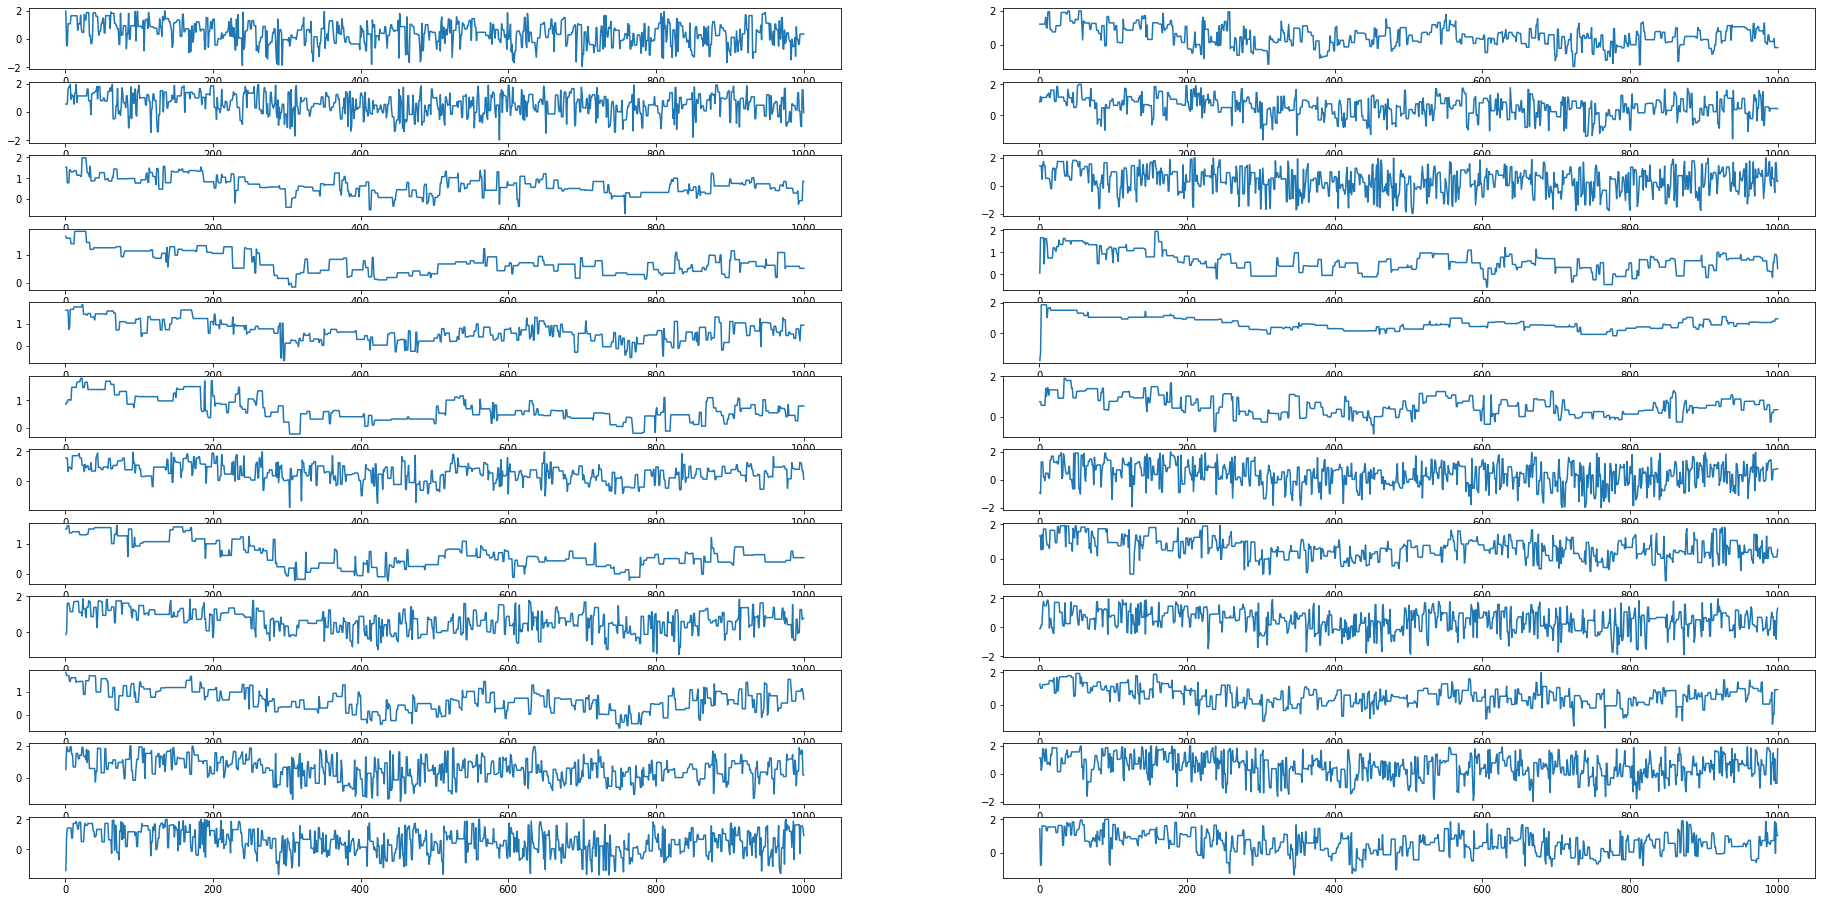

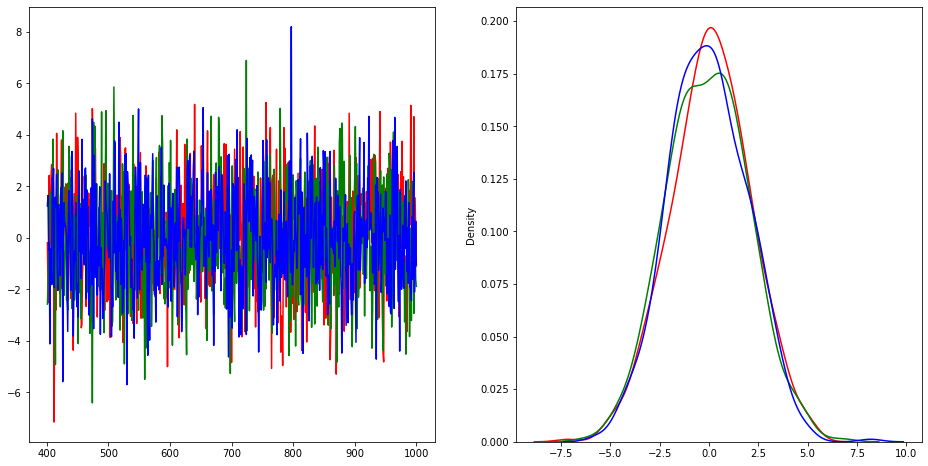

<Figure size 432x288 with 0 Axes>

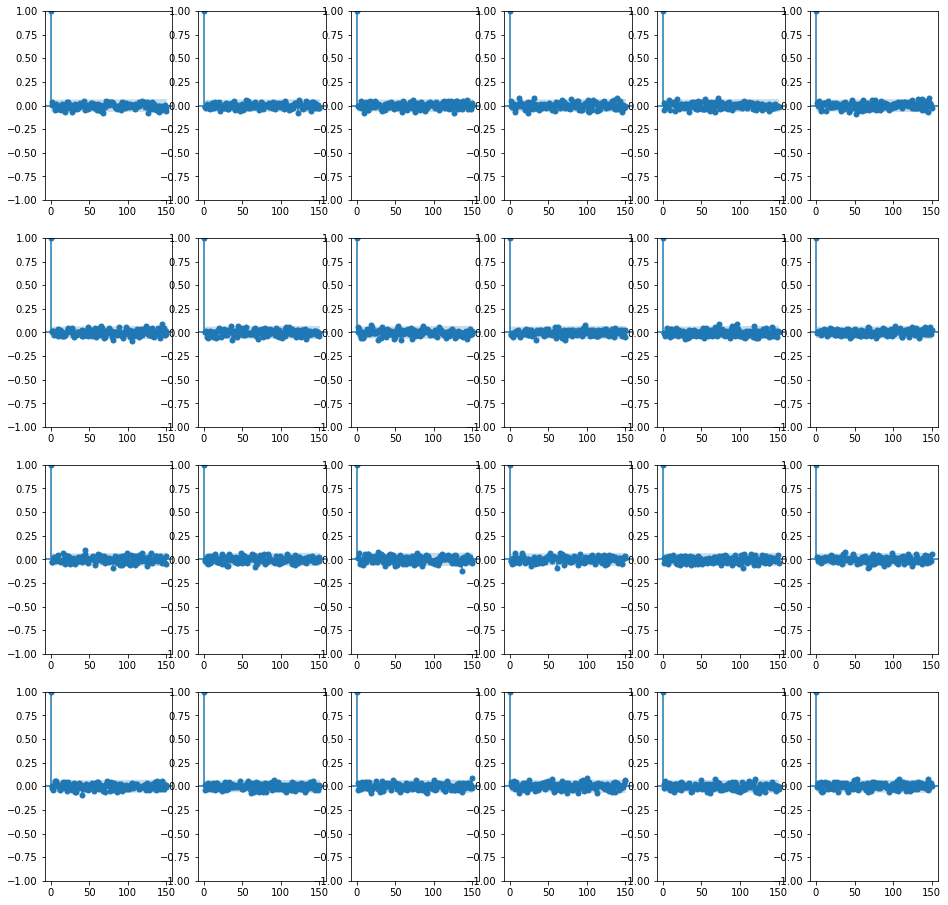

<Figure size 432x288 with 0 Axes>

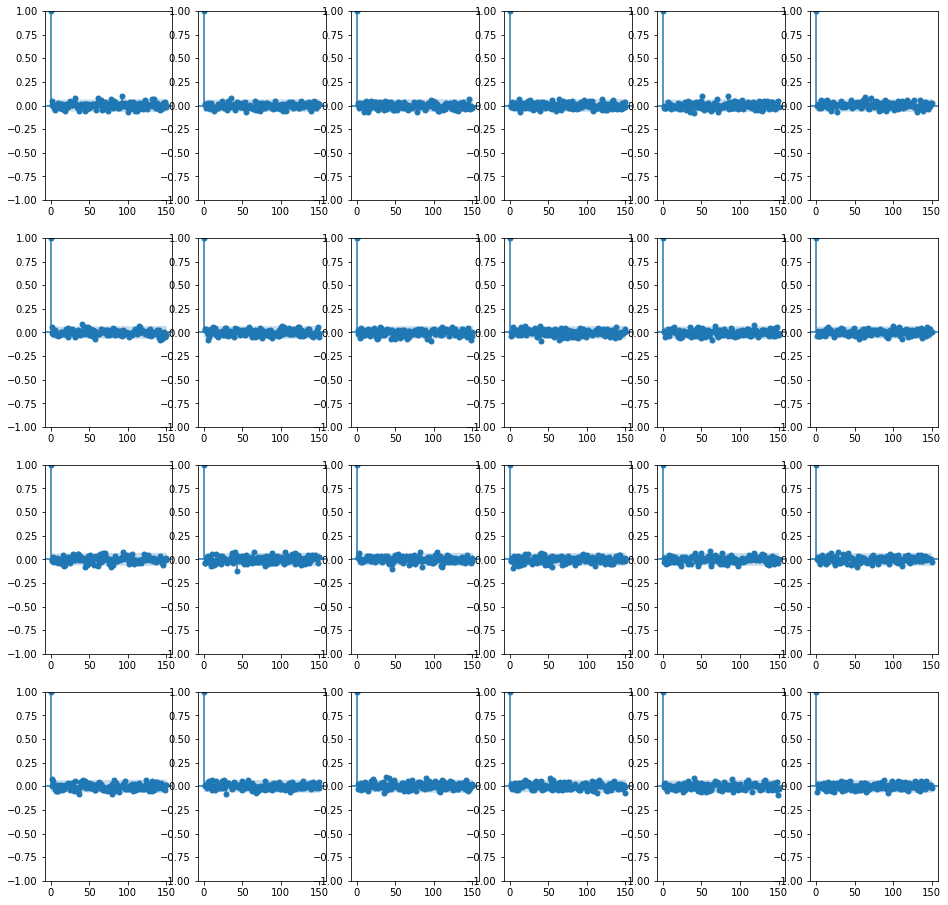

<Figure size 432x288 with 0 Axes>

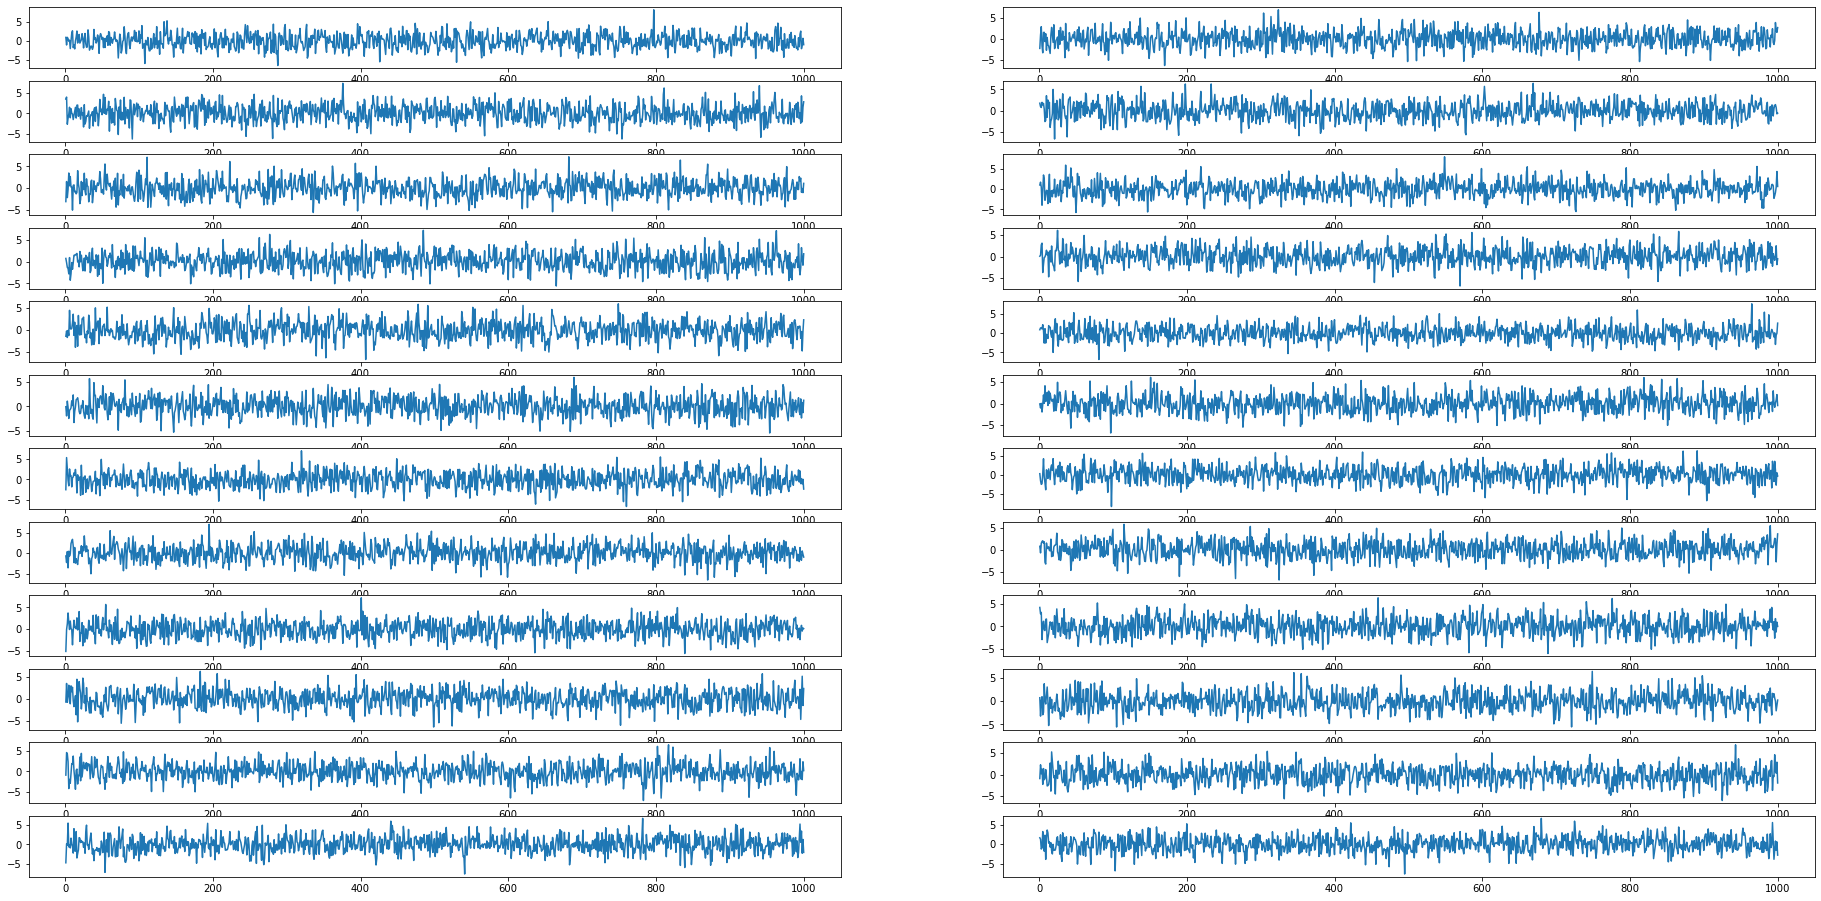

<Figure size 432x288 with 0 Axes>

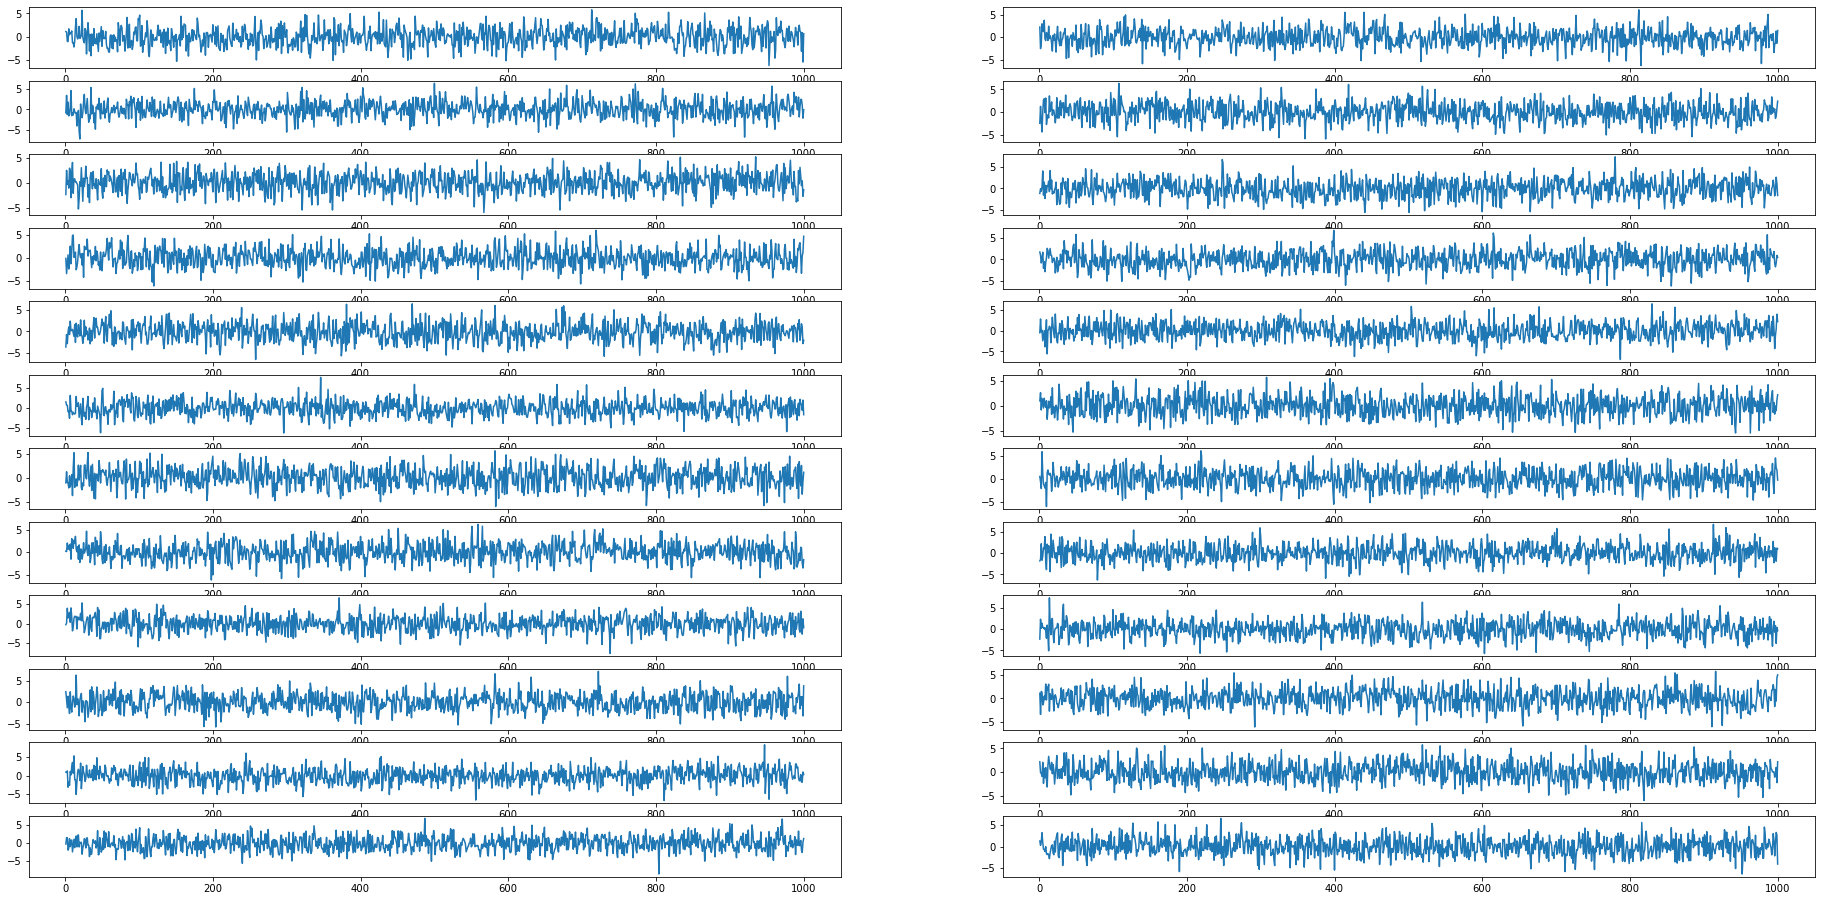

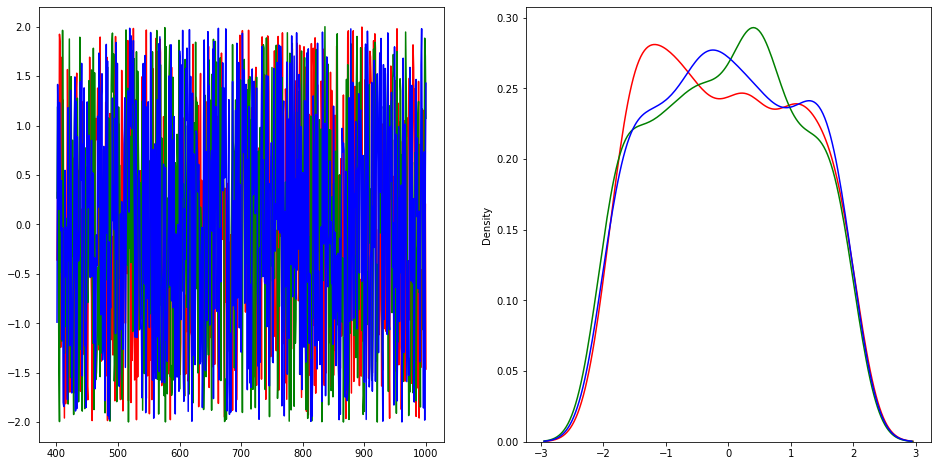

<Figure size 432x288 with 0 Axes>

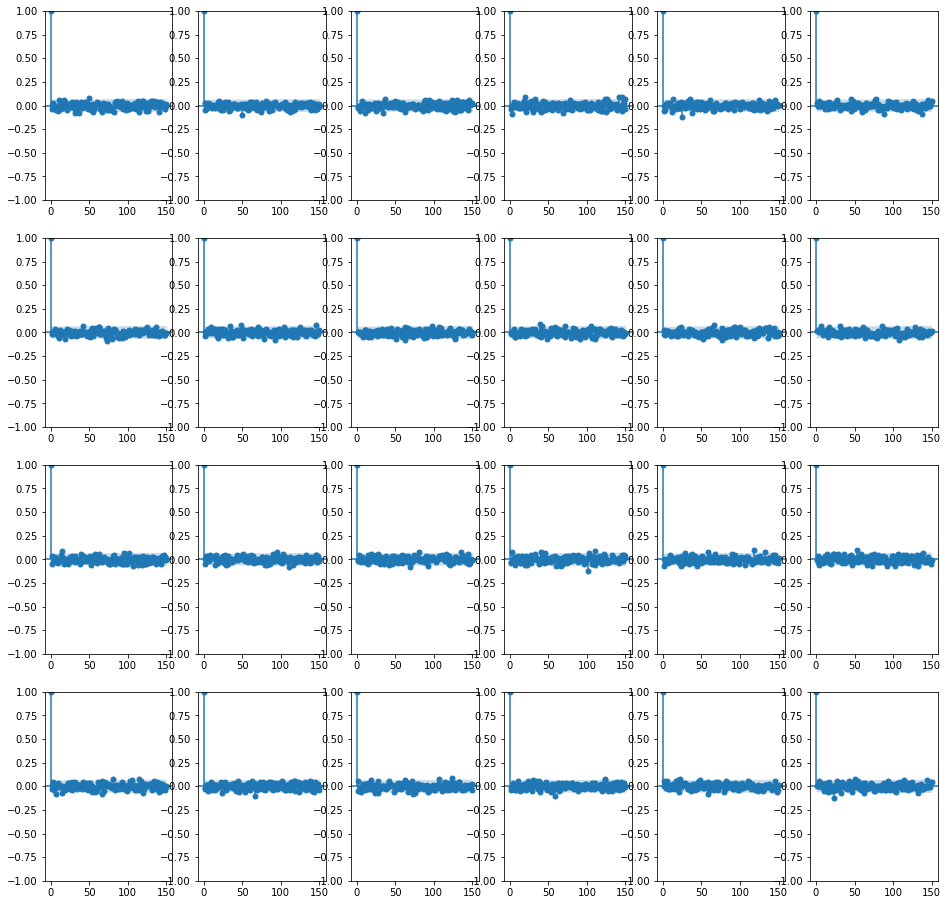

<Figure size 432x288 with 0 Axes>

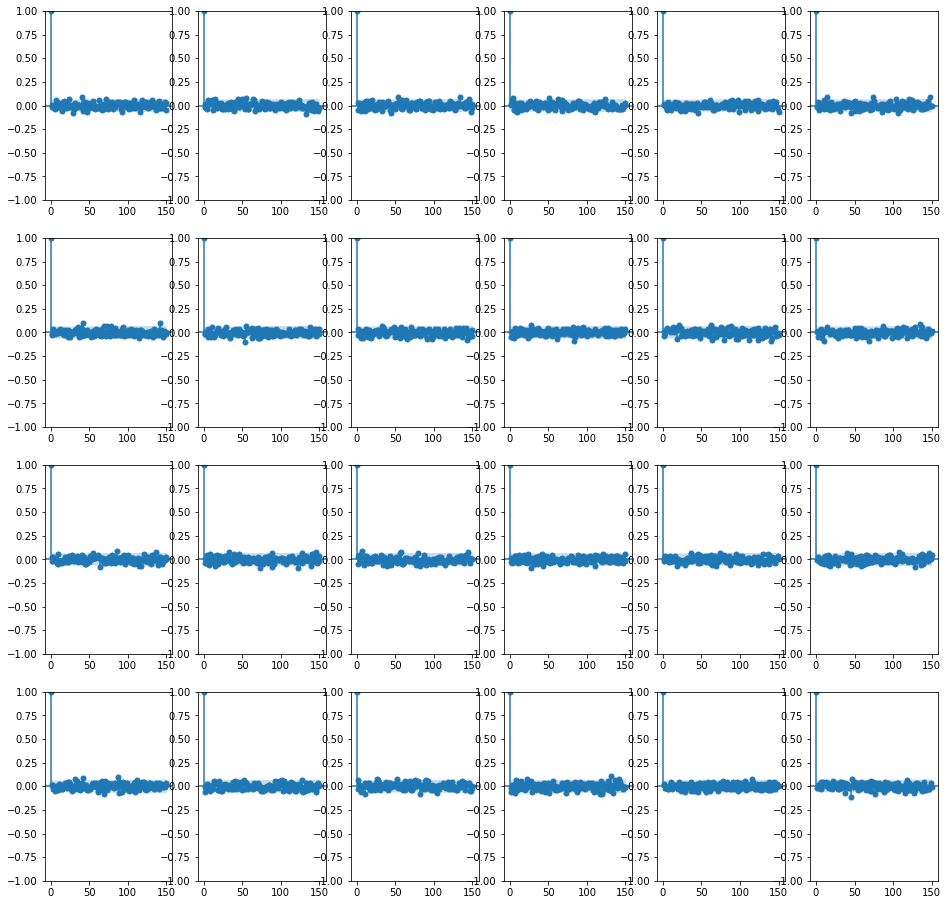

<Figure size 432x288 with 0 Axes>

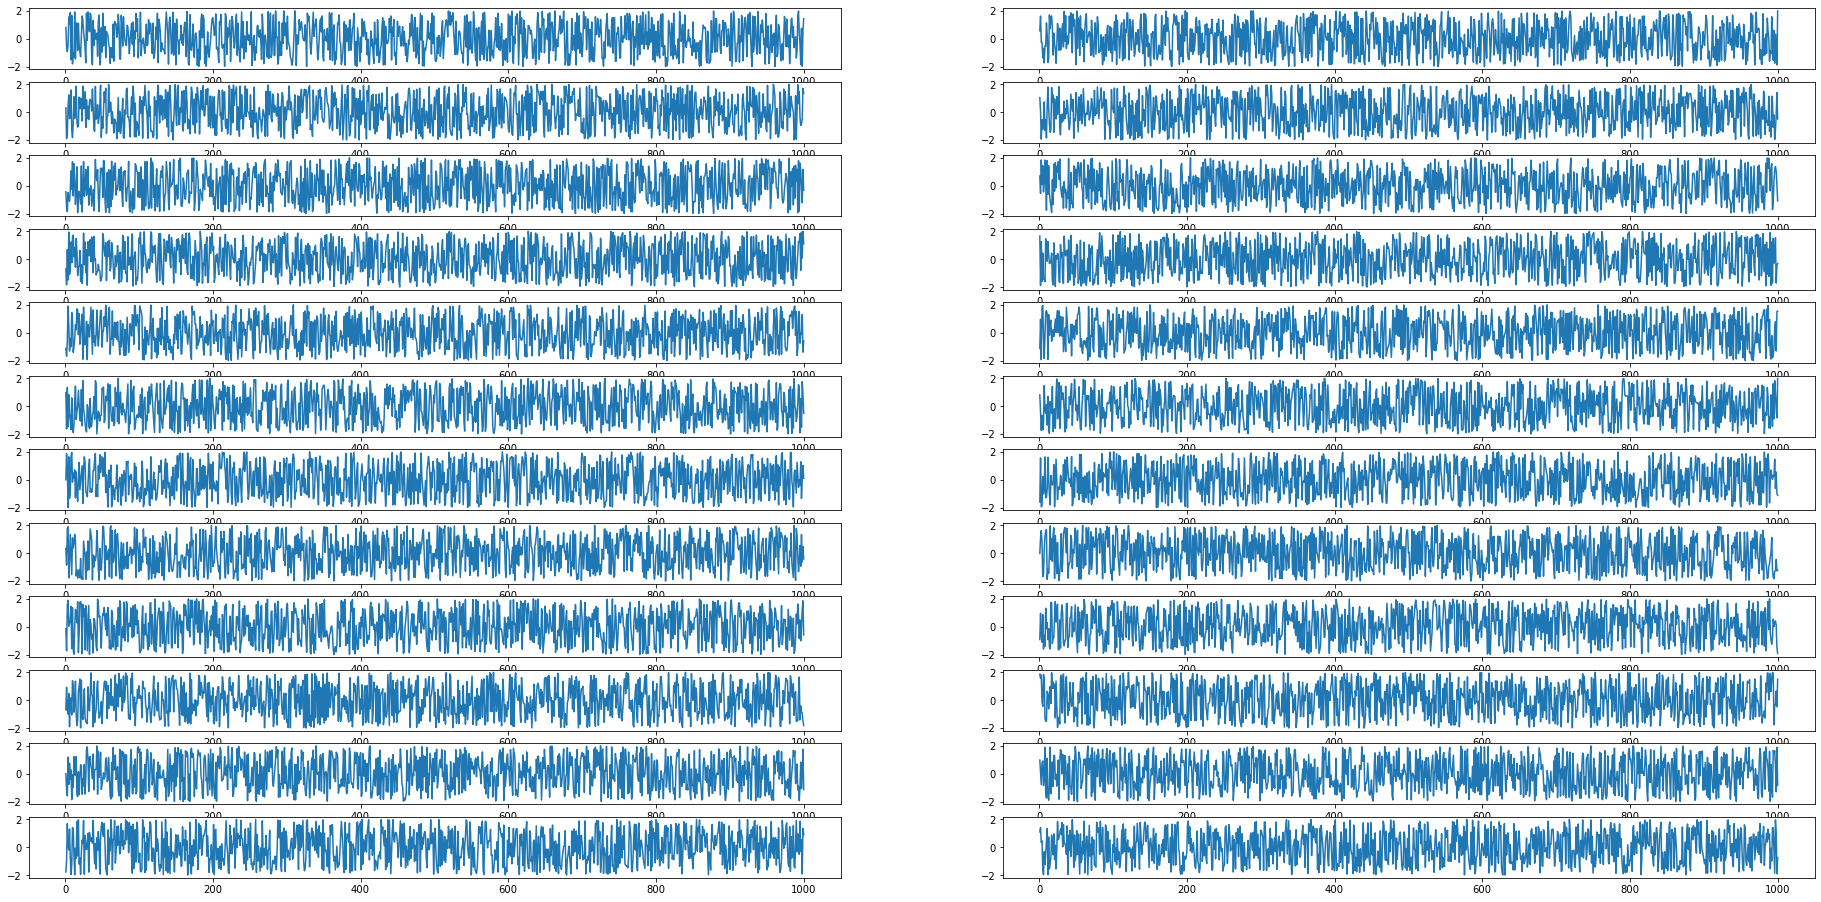

<Figure size 432x288 with 0 Axes>

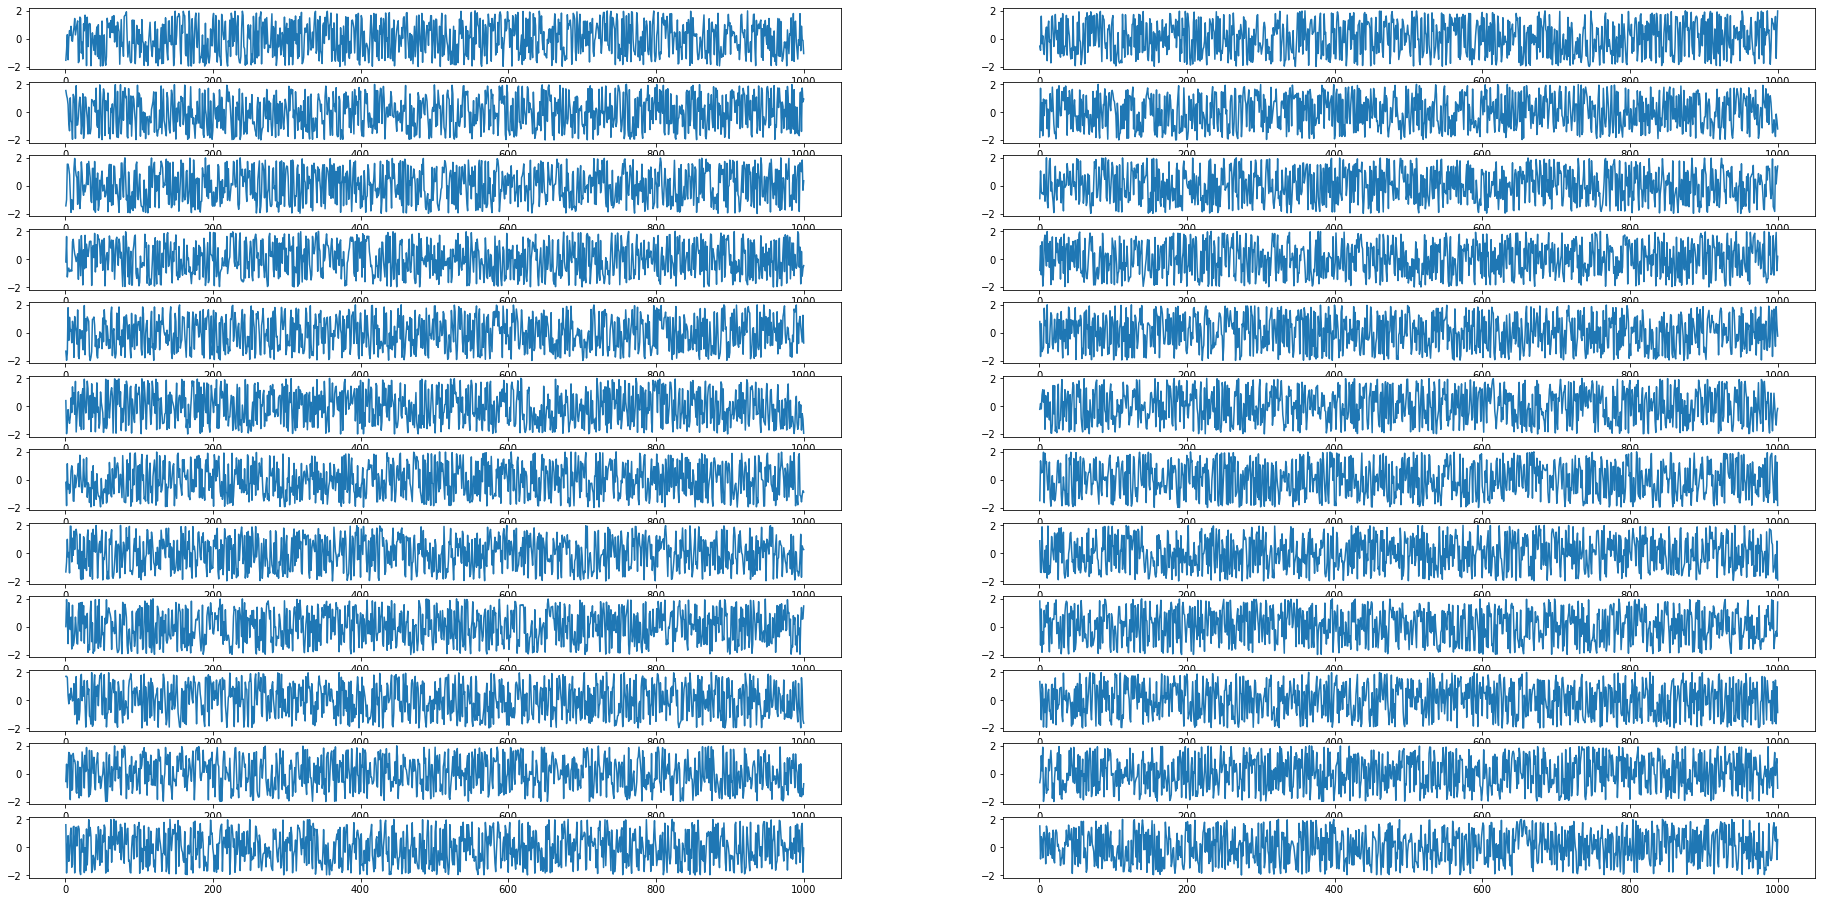

In [2]:
from main import pipeline, inference
from utils import dataloader
from MCMC import MH
import numpy as np
import warnings

warnings.filterwarnings('ignore')

data_o, data_oe = dataloader()
trail_time = 1000
burn_in = 400
sampler1 = lambda x: np.random.normal(0, 2, size=x)
sampler2 = lambda x: np.random.uniform(-2, 2, size=x)
samples = []
for i, data in enumerate([data_o, data_oe]):
    tmp1 = pipeline(data, trail_time, burn_in, 'normal/model{}/'.format(i + 1), MH, sampler1, is_scratch=True, mode=i + 1)
    tmp2 = pipeline(data, trail_time, burn_in, 'uniform/model{}/'.format(i + 1), MH, sampler2, is_scratch=True, mode=i + 1)
    samples.append([tmp1, tmp2])

f = []
for i, data in enumerate([data_o, data_oe]):
    f1 = inference(data, samples[i][0])
    f2 = inference(data, samples[i][1])
    f.append([f1, f2])

In [3]:
# import arviz as az
from mcmc_diagnostics.effective_sample_size import estimate_ess

for i, tmp in enumerate(f):
#     ess1 = az.ess(sample[0])
#     ess2 = az.ess(sample[1])
    ess1 = estimate_ess(np.array(tmp[0]))
    ess2 = estimate_ess(np.array(tmp[1]))
    print('Model-{}\nESS-normal: {}\nESS-uniform: {}'.format(i + 1, ess1, ess2))

Model-1
ESS-normal: [107.72034969]
ESS-uniform: [197.96653477]
Model-2
ESS-normal: [1000.]
ESS-uniform: [1000.]


In [4]:
estimate_ess(np.array(f[1][1]))

array([1000.])